<img src="../dsi.png" style="height:128px;">

# Lesson 7: Data Visualization

So far on our journey through Python, you may have noticed that we’ve been working a lot with numbers and data, whether it's to perform single-step calculations or to manipulate entire tables. But wait... there's more! Today we'll learn to appreciate the power of programming to _visualise_ data. Scientists use diagrams, or _informative pictures_ to represent their work in a meaningful way. Now, we will do the same by programmatically generate graphs.
 
To do so, we will use a Python _library_ called `matplotlib`.
What is a library?
A Python library groups together a set of programs with capabilities that we can apply to many use cases. Where do You might also hear people using the word "package" in a similar way as the word "library".
Where do these libraries come from?
There is a rich community of Python users online. People like you and me can create and share Python libraries. One benefit to having so many public libraries is that if you want to write code to do something, chances are there already exists a Python library to help you achieve your goal! Another good part about having so many public resources is that many are _well-documented_. This means that if you don't know how to use a library, you can look it up online and learn how to use it by reading the documentation!

`matplotlib` is a popular plotting/data visualization Python library that has a useful sub-collection of functions called `pyplot`. In addition to using `matplotlib.pyplot`, we'll also use `numpy` to help manipulate the data.

In [16]:
# Run this cell to import, or load, the useful resources from Python libraries
# Remember, one way to run cells is to press `SHIFT`+`ENTER`

# We're using the nickname `np` for `numpy`!
import numpy as np

# We want all of the functions from the `datascience` package. (This lets you build Tables, etc.)
from datascience import *

# The star of the show! We are using the nickname `plt` for `pyplot`, which is found within `matplotlib`.
from matplotlib import pyplot as plt

# Just some display and formatting details
%matplotlib inline
plt.style.use('fivethirtyeight')

Note: The identifiers (nicknames) `np` and `plt` are what programmers conventionally use to abbreviate, or shorten, the longer names of the libraries. You could just as well use `ahaana` or `hamsa` or `maria` instead, and your code would still work! This won't make your program wrong, but following the conventions is recommended and does make your code easier to read. :)

### Example

Let’s start off using this new tool with an example. Plot a graph for the equation `y = 2x + 5`, where the values of x range from 1 to 10.

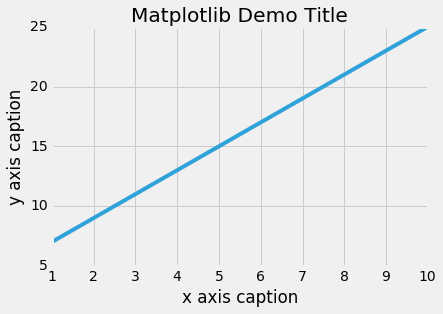

In [17]:
# Solution
x = np.arange(1,11) # What does this do? Try seeing the output of `print(x)` to find out...
y = 2 * x + 5 # Is `y` equal to a single number or a set of numbers? Check by running `print(y)
plt.title("Matplotlib Demo Title") # Adds a title to the plot
plt.xlabel("x axis caption") # Labelling both axes is a good practice!
plt.ylabel("y axis caption") # Labels let you know at a glance what data you've just represented.
plt.plot(x,y) # This plots the data. Try commenting out this line (Hint: use #), run the cell, and see what happens.
plt.show()

Try it yourself! You you don't have to plot a linear function, x and y just have to be two different arrays.

In [ ]:
x = # Replace with a range of numbers
y = # Replace with an expression using `x`
plt.title("Replace with a Title!") 
plt.xlabel("Don't forget to...") 
plt.ylabel("...label your axes!") 
plt.plot(x,y) 
plt.show()

### Tourism!

Here is a table that contains data about the number and nationalities of foreign tourists who visited India in the years 2001 through 2010.

Source: https://data.gov.in/catalog/number-foreign-tourists-india

In [27]:
tourism = Table().read_table("foreign_tourists.csv")
tourism

Nationality,Region,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Canada,NORTH AMERICA,88600,93598,107671,135884,157643,176567,208214,222364,224069,242372
U.S.A.,NORTH AMERICA,329147,348182,410803,526120,611165,696739,799062,804933,827140,931292
Total,NORTH AMERICA,417747,441780,518474,662004,768808,873306,1007276,1027297,1051209,1173664
Argentina,CENTRAL AND SOUTH AMERICA,2906,1359,1805,2799,3313,4493,4992,5087,6011,7626
Brazil,CENTRAL AND SOUTH AMERICA,3819,3622,4528,7397,7005,9148,10788,11530,13964,15219
Mexico,CENTRAL AND SOUTH AMERICA,3473,3105,3563,4570,5398,6502,8299,9272,8185,10458
Others,CENTRAL AND SOUTH AMERICA,11727,9586,11758,13399,19870,18602,18240,17616,18444,29425
Total,CENTRAL AND SOUTH AMERICA,21925,17672,21654,28165,35586,38745,42319,43505,46604,62728
Austria,WESTERN EUROPE,17787,13801,16903,21093,27187,28045,26692,25900,27930,32620
Belgium,WESTERN EUROPE,18851,13945,17309,24007,25596,29156,34207,36277,34759,37709


Let's see how the number of tourists from the U.S.A. has changed over these years!

In [46]:
tourism_by_region = tourism.drop(0).group('Region', max)
tourism_by_region

Region,2001 max,2002 max,2003 max,2004 max,2005 max,2006 max,2007 max,2008 max,2009 max,2010 max
EASTERN EUROPE,38863,40628,55252,82426,101445,121309,152764,191110,183475,227650
Others,33319,9366,10232,13692,21818,25320,32676,34540,15588,12087
STATELESS,9393,13487,15516,1434,13490,647,26237,1025,624,670
WEST ASIA,96424,92562,103596,122808,133821,146693,171661,215542,204843,235317
AFRICA,90962,83457,93353,115493,134801,142813,157485,141750,164474,204525
AUSTRALASIA,66104,63261,73849,100944,119778,137436,167063,178308,182451,210275
CENTRAL AND SOUTH AMERICA,21925,17672,21654,28165,35586,38745,42319,43505,46604,62728
EAST ASIA,130464,115424,150506,201627,223567,282985,352037,355230,322797,411947
NORTH AMERICA,417747,441780,518474,662004,768808,873306,1007276,1027297,1051209,1173664
SOUTH ASIA,672133,630653,666889,790698,841969,908916,982428,1051846,1001401,1047444


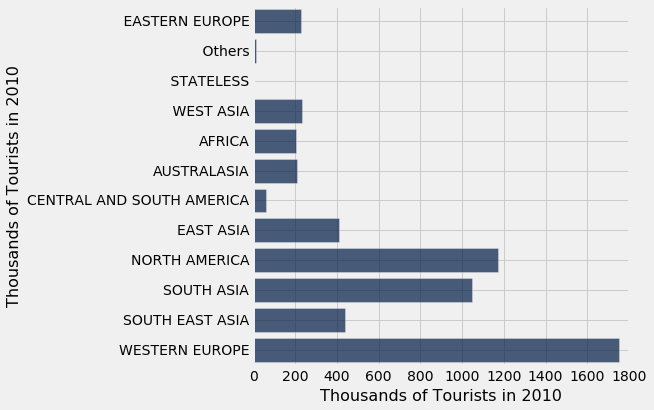

In [59]:
tourism_by_region.select(0).with_column('Thousands of Tourists in 2010', tourism_by_region.apply(lambda x: x / 1000, -1)).barh(0,1)